<a href="https://colab.research.google.com/github/esn73/lab_python/blob/master/ml10_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

# wine 데이터 셋 준비

In [2]:
wine_csv = 'https://github.com/JakeOh/202110_itw_lab_python/raw/main/wine.csv'

In [3]:
wine = pd.read_csv(wine_csv)

In [4]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [7]:
np.unique(wine['class'], return_counts=True) # 0 red 1 white

(array([0., 1.]), array([1599, 4898]))

In [8]:
featuer_names = ['alcohol', 'sugar', 'pH']

In [9]:
feature_names = wine.columns[:-1]   # 특성(변수)들의 이름
traget_names =['red wine', 'white wine'] #class 0: red 1 white

In [10]:
X = wine.iloc[:, :-1].values # 특성 행렬(2차원 배열)
y = wine['class'].values # 타겟(레이블)배열

In [11]:
X[:5, :]

array([[9.4 , 1.9 , 3.51],
       [9.8 , 2.6 , 3.2 ],
       [9.8 , 2.3 , 3.26],
       [9.8 , 1.9 , 3.16],
       [9.4 , 1.9 , 3.51]])

In [12]:
y[:5]

array([0., 0., 0., 0., 0.])

# 훈련 셋, 테스트 셋 분리

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [14]:
X_train.shape, X_test.shape

((5197, 3), (1300, 3))

In [15]:
y_train.shape, y_test.shape

((5197,), (1300,))

In [16]:
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([1279, 3918]))

In [17]:
np.unique(y_test, return_counts=True)

(array([0., 1.]), array([320, 980]))

# Decision Tree(의사결정 나무 / 결정 트리) 분류

In [18]:
tree_clf = DecisionTreeClassifier(random_state=42)  # 모델 생성

In [19]:
tree_clf.fit(X_train, y_train)   # 모델 훈련

DecisionTreeClassifier(random_state=42)

In [20]:
train_pred = tree_clf.predict(X_train) # 훈련 셋 예측값

## 훈련 셋 평가

In [21]:
train_pred[:10]

array([1., 1., 1., 0., 0., 0., 1., 1., 1., 0.])

In [22]:
y_train[:10]

array([1., 1., 1., 0., 0., 0., 1., 1., 1., 0.])

In [23]:
confusion_matrix(y_train, train_pred)

array([[1276,    3],
       [   8, 3910]])

In [24]:
accuracy_score(y_train, train_pred)

0.9978833942659227

## 테스트 셋 평가

In [25]:
test_pred = tree_clf.predict(X_test)

In [26]:
confusion_matrix(y_test, test_pred)

array([[226,  94],
       [ 81, 899]])

In [27]:
accuracy_score(y_test, test_pred)   # 오버피팅이 심한 결과 - 과대적합 

0.8653846153846154

Decision tree는 overfitting(과대적합)이 심하다. 훈련셋  > 테스트셋

## Decision Tree 시각화

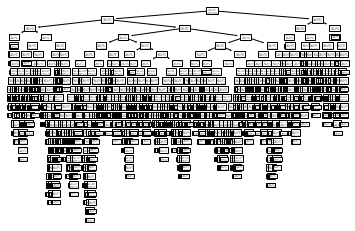

In [28]:
plot_tree(tree_clf)
plt.show()

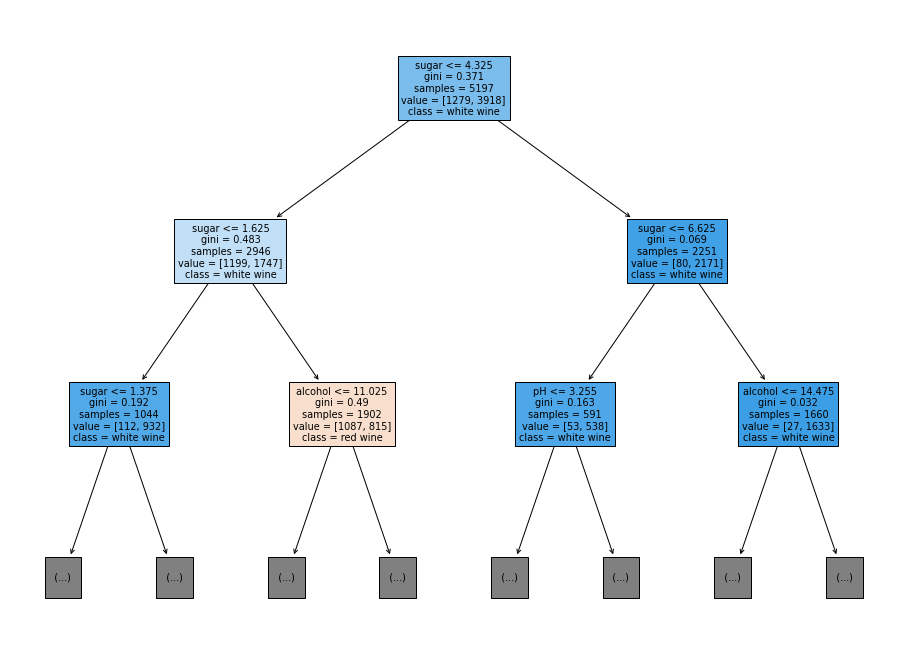

In [29]:
plt.figure(figsize=(16, 12))
plot_tree(tree_clf, max_depth=2,
          feature_names=feature_names, class_names=traget_names, filled=True) # root에서 두칸 내려옴
plt.show()

* Decision Tree의 장점
    * 특성들을 스케일로 변환할 필요가 없음.
    * 결과를 이해하기 쉬움.
* Decision Tree의 단점
    * 과대적합(overfitting)되기 쉬움.
        * 여러가지 규제를 적용하거나 하이퍼 파라미터 튜닝을 통해서 과대적합 문제를 해결해야 함.

# Hyperparameter tuning

* 전체 데이터를 훈련(train)-검증(validation)-테스트(test) 셋으로 나눔.
    * 전체 데이터를 훈련-테스트 셋으로 분리.
    * 훈련 셋을 훈련-검증 셋으로 분리.`
* 하이퍼파라미터를 바꿔가면서 훈련 셋으로 모델을 훈련.
* 하이퍼파라미터 값에 다른 모델의 성능을 검증 셋으로 테스트.
* 검증 셋에서 점수가 가장 좋은 모델(하이퍼파라미터)를 선택.
* 튜닝이 끝난 모델의 일반화 성능을 예측하기 위한 용도로만 테스트 셋을 사용.

In [30]:
X.shape, y.shape

((6497, 3), (6497,))

In [32]:
# 전체 데이터 셋(X, y)를 훈련-테스트셋으로 분리
X_tr_full, X_test, y_tr_full, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        stratify=y,
                                                        random_state=42)

In [33]:
# 훈련 셋을 다시 훈련-검증 셋으로 분리
X_train, X_val, y_train, y_val = train_test_split(X_tr_full, y_tr_full, test_size=0.2,
                                                  stratify=y_tr_full,
                                                  random_state=42)

In [37]:
# 훈련(train)-검증(valiidation)-테트스(test) 셋
X_train.shape, X_val.shape, X_test.shape

((4157, 3), (1040, 3), (1300, 3))

In [38]:
y_train.shape, y_val.shape, y_test.shape

((4157,), (1040,), (1300,))

In [39]:
DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTree의 max_depth 값을 변화시키면서 훈련/검증 셋에서 정확도 계산

In [43]:
train_scores = [] # 훈련 셋에서의 정확도들을 저장할 리스트
val_scores = [] # 검증 셋에서의 정확도들을 저장할 리스트
depths = np.arange(1, 21)   # Decision Tree의 max_depth 값들 

for d in depths:    # max_depth 값을 1 ~ 20까지 반복
    tree_clf = DecisionTreeClassifier(max_depth=d) # 모델 훈련
    tree_clf.fit(X_train, y_train)  # 훈련 셋으로 모델을 학습시킴.
    train_acc = tree_clf.score(X_train, y_train) # 훈련 셋의 정확도
    train_scores.append(train_acc)
    val_acc = tree_clf.score(X_val, y_val)  # 검증 셋의 정확도
    val_scores.append(val_acc)

print(train_scores)
print(val_scores)

[0.7539090690401732, 0.8270387298532595, 0.8272792879480394, 0.8636035602598028, 0.8691363964397402, 0.8775559297570363, 0.8888621602116912, 0.8989656001924464, 0.9129179696896801, 0.9297570363242723, 0.9480394515275439, 0.9557373105605004, 0.9737791676689921, 0.9800336781332691, 0.9886937695453452, 0.9915804666827038, 0.9954293961991821, 0.9966321866730815, 0.9973538609574212, 0.9980755352417608]
[0.7538461538461538, 0.8298076923076924, 0.8298076923076924, 0.864423076923077, 0.875, 0.8682692307692308, 0.8625, 0.8653846153846154, 0.8605769230769231, 0.8596153846153847, 0.864423076923077, 0.864423076923077, 0.8740384615384615, 0.8692307692307693, 0.8711538461538462, 0.8778846153846154, 0.8663461538461539, 0.8740384615384615, 0.8701923076923077, 0.8701923076923077]


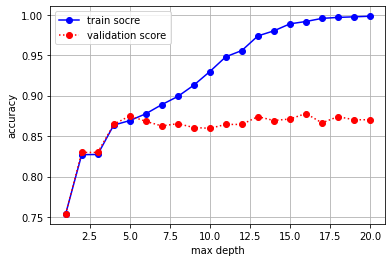

In [46]:
# 훈련-검증 셋 정확도 시각화
plt.plot(depths, train_scores, 'bo-', label='train socre')
plt.plot(depths, val_scores, 'ro:', label='validation score')

plt.grid()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

위 결과를 보면 decision tree의 max_depth를 6보다 더 크게 하는 것은 테스트 셋의 정확도를 높이지 못하고(일반화 성능이 좋아지지는 않고) 과대적합(overfiting)만 더 커지는 결과임.

In [47]:
from pandas.core.common import random_state
# 적절한 하이퍼파라미터가 선택된(튜닝된) 모델을 다시 훈련.
tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_tr_full, y_tr_full)
tree_clf.score(X_test, y_test)  # 일반화 성능 측정

0.8484615384615385

# 교차 검증(Cross Validation)

In [48]:
from sklearn.model_selection import cross_validate

In [49]:
# 교차 검증에서 사용할 훈련 셋, 테스트 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [51]:
# 교차 검증에서 사용할 머신 러닝 모델
tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)

In [52]:
cv = cross_validate(estimator=tree_clf, X=X_train, y=y_train,
                    cv=5, n_jobs=-1, return_train_score=True)
# cross_validate 함수의 파라미터
# cv: 교차 검증의 fold 개수. 기본값은 5.
# n_jobs: 사용하는 CPU 코어의 개수(쓰레드 개수). 기본값은 1. -1은 사용가능한 모든 CPU 코어를 사용하겠다는 의미.
# return_train_score: 훈련 셋의 점수(정확도 또는 R^2 score)를 계산할 지를 결정. 기본값은 False.

In [53]:
cv

{'fit_time': array([0.00775957, 0.0074234 , 0.00719571, 0.00827384, 0.00884461]),
 'score_time': array([0.00283957, 0.00271511, 0.00097537, 0.00105619, 0.00324988]),
 'test_score': array([0.87019231, 0.86634615, 0.84889317, 0.86429259, 0.86044273]),
 'train_score': array([0.87466923, 0.8811643 , 0.88455988, 0.88095238, 0.88648389])}

In [54]:
# 검증 셋의 점수들의 평균
np.mean(cv['test_score'])

0.8620333900940252

교차 검증에서 test_score의 평균으로 테스트 셋의 점수(일반화 성능)를 예상할 수 있음.

In [55]:
tree_clf.fit(X_train, y_train)
tree_clf.score(X_test, y_test)

0.8484615384615385

# GridSearchCV

교차 검증(Cross Validation)을 사용한 하이퍼파라미터 튜닝 방법

In [56]:
from sklearn.model_selection import GridSearchCV

Decision Tree의 하이퍼 파라미터:

* max_depth: 나무의 최대 깊이.
* max_leaf_node: leaf node의 최대 개수.
* max_features: 각 노드에서 분할에 사용할 특성의 최대 개수.
* min_samples_split: 분할되기 위해서 노드가 가져야 하는 샘플의 최소 개수(또는 비율).
* min_samples_leaf: leaf node가 가지고 있어야할 샘플의 최소 개수(또는 비율).

> `max_`로 시작하는 파라미터들은 값을 증가시키면 나무의 크기가 더 커짐. overfitting이 커짐. `max_`로 시작하는 파라미터들은 값을 감소시킬 때 overfitting이 줄어듦.

> `min_`으로 시작하는 파라미터들은 값을 감소시키면 나무의 크기다 더 커짐.
`min_`으로 시작하는 파라미터들은 값을 증가시킬 때 overfitting이 줄어듦.


In [57]:
# 훈련 셋, 테스트 셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [58]:
# Grid Search 교차 검증으로 파라미터들을 튜닝할 머신 러닝 모델
tree_clf = DecisionTreeClassifier(random_state=42)

In [61]:
# Grid Search 교차 검증으로 튜닝할 파라미터들의 목록 20 * 4 
params = {'max_depth': np.arange(1, 21),
          'min_samples_split': [0.001, 0.01, 0.1, 0.2]} # 5200개 중에서 0.1% 1%  10% 20%

In [64]:
# GridSearchCV 객체 생성
grid_search_cv = GridSearchCV(estimator=tree_clf,
                              param_grid=params, cv=5, n_jobs=-1)

In [66]:
# GridSearchCV을 수행: 훈련 데이터로 모델을 학습시킴. 400번의 반복분
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'min_samples_split': [0.001, 0.01, 0.1, 0.2]})

In [67]:
# GridSearchCV를 통해서 찾은 가장 적합한 파라미터들의 조합
grid_search_cv.best_params_

{'max_depth': 11, 'min_samples_split': 0.01}

In [68]:
# GridSearchCV를 통해서 찾은 가장 높은 검증 셋 점수
grid_search_cv.best_score_

0.8666522914044569

In [70]:
# GridSearchCV를 통해서 찾은 가장 적합한 모델
best_model = grid_search_cv.best_estimator_
best_model

DecisionTreeClassifier(max_depth=11, min_samples_split=0.01, random_state=42)

In [71]:
# 최종적으로 훈련에 한번도 사용되지 않은 테스트 셋을 사용해서 일반화 성능을 예상
best_model.score(X_test, y_test)

0.8538461538461538